## Abstract

## Setup

In [ ]:
import pandas as pd
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)


pd.options.display.max_columns = None# Show all columns
df.head()

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,dem_female,dem_age_band_18-24_tm1,dem_age_band_25-34_tm1,dem_age_band_35-44_tm1,dem_age_band_45-54_tm1,dem_age_band_55-64_tm1,dem_age_band_65-74_tm1,dem_age_band_75+_tm1,alcohol_elixhauser_tm1,anemia_elixhauser_tm1,arrhythmia_elixhauser_tm1,arthritis_elixhauser_tm1,bloodlossanemia_elixhauser_tm1,coagulopathy_elixhauser_tm1,compdiabetes_elixhauser_tm1,depression_elixhauser_tm1,drugabuse_elixhauser_tm1,electrolytes_elixhauser_tm1,hypertension_elixhauser_tm1,hypothyroid_elixhauser_tm1,liver_elixhauser_tm1,neurodegen_elixhauser_tm1,obesity_elixhauser_tm1,paralysis_elixhauser_tm1,psychosis_elixhauser_tm1,pulmcirc_elixhauser_tm1,pvd_elixhauser_tm1,renal_elixhauser_tm1,uncompdiabetes_elixhauser_tm1,valvulardz_elixhauser_tm1,wtloss_elixhauser_tm1,cerebrovasculardz_romano_tm1,chf_romano_tm1,dementia_romano_tm1,hemiplegia_romano_tm1,hivaids_romano_tm1,metastatic_romano_tm1,myocardialinfarct_romano_tm1,pulmonarydz_romano_tm1,tumor_romano_tm1,ulcer_romano_tm1,cost_dialysis_tm1,cost_emergency_tm1,cost_home_health_tm1,cost_ip_medical_tm1,cost_ip_surgical_tm1,cost_laboratory_tm1,cost_op_primary_care_tm1,cost_op_specialists_tm1,cost_op_surgery_tm1,cost_other_tm1,cost_pharmacy_tm1,cost_physical_therapy_tm1,cost_radiology_tm1,lasix_dose_count_tm1,lasix_min_daily_dose_tm1,lasix_mean_daily_dose_tm1,lasix_max_daily_dose_tm1,cre_tests_tm1,crp_tests_tm1,esr_tests_tm1,ghba1c_tests_tm1,hct_tests_tm1,ldl_tests_tm1,nt_bnp_tests_tm1,sodium_tests_tm1,trig_tests_tm1,cre_min-low_tm1,cre_min-high_tm1,cre_min-normal_tm1,cre_mean-low_tm1,cre_mean-high_tm1,cre_mean-normal_tm1,cre_max-low_tm1,cre_max-high_tm1,cre_max-normal_tm1,crp_min-low_tm1,crp_min-high_tm1,crp_min-normal_tm1,crp_mean-low_tm1,crp_mean-high_tm1,crp_mean-normal_tm1,crp_max-low_tm1,crp_max-high_tm1,crp_max-normal_tm1,esr_min-low_tm1,esr_min-high_tm1,esr_min-normal_tm1,esr_mean-low_tm1,esr_mean-high_tm1,esr_mean-normal_tm1,esr_max-low_tm1,esr_max-high_tm1,esr_max-normal_tm1,ghba1c_min-low_tm1,ghba1c_min-high_tm1,ghba1c_min-normal_tm1,ghba1c_mean-low_tm1,ghba1c_mean-high_tm1,ghba1c_mean-normal_tm1,ghba1c_max-low_tm1,ghba1c_max-high_tm1,ghba1c_max-normal_tm1,hct_min-low_tm1,hct_min-high_tm1,hct_min-normal_tm1,hct_mean-low_tm1,hct_mean-high_tm1,hct_mean-normal_tm1,hct_max-low_tm1,hct_max-high_tm1,hct_max-normal_tm1,ldl_min-low_tm1,ldl_min-high_tm1,ldl_min-normal_tm1,ldl-mean-low_tm1,ldl-mean-high_tm1,ldl-mean-normal_tm1,ldl_max-low_tm1,ldl_max-high_tm1,ldl_max-normal_tm1,nt_bnp_min-low_tm1,nt_bnp_min-high_tm1,nt_bnp_min-normal_tm1,nt_bnp_mean-low_tm1,nt_bnp_mean-high_tm1,nt_bnp_mean-normal_tm1,nt_bnp_max-low_tm1,nt_bnp_max-high_tm1,nt_bnp_max-normal_tm1,sodium_min-low_tm1,sodium_min-high_tm1,sodium_min-normal_tm1,sodium_mean-low_tm1,sodium_mean-high_tm1,sodium_mean-normal_tm1,sodium_max-low_tm1,sodium_max-high_tm1,sodium_max-normal_tm1,trig_min-low_tm1,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,90.0,380.0,640.0,3370.0,700.0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,110.0,0.0,0.0,0.0,200.0,1480.0,2130.0,1940.0,6200.0,0.0,0.0,300.0,0,0,0.0,0,1,0,0,0,2,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,4,3
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,1,0,1,0,0,0,0,0,0,0,0,0

/var/folders/gx/d6zl9l4908q7p_vk4j3x06x00000gn/T/ipykernel_92329/1468095871.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = df.groupby(["percentile", "race", "dem_female"])["gagne_sum_t"].mean().reset_index()


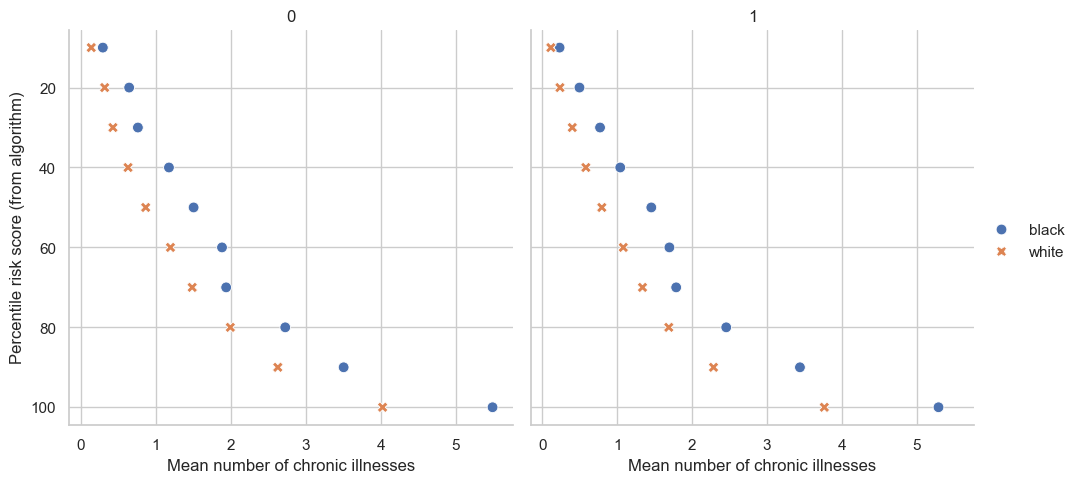

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df["percentile"] = pd.qcut(df['risk_score_t'], q=10, labels=np.linspace(10, 100, 10))

# Compute mean chronic illnesses by percentile and race
summary_df = df.groupby(["percentile", "race", "dem_female"])["gagne_sum_t"].mean().reset_index()


# Create FacetGrid for Male & Female
g = sns.FacetGrid(summary_df, col="dem_female", height=5, aspect=1, sharex=True, sharey=True)

# Map scatterplot to each gender
g.map_dataframe(sns.scatterplot, x="gagne_sum_t", y="percentile", hue="race",
                style="race", markers={"black": "o", "white": "X"}, s=60)

# Adjust labels
g.set_axis_labels("Mean number of chronic illnesses", "Percentile risk score (from algorithm)")
g.set_titles(col_template="{col_name}")

# Add legend
g.add_legend()

# Show plot
plt.show()
